In [2]:
!pip install requests fuzzywuzzy pandas pyjstat numpy plotly matplotlib seaborn geopy google folium pandas googlemaps

     |████████████████████████████████| 901kB 3.1MB/s 
  Created wheel for pyjstat: filename=pyjstat-2.2.0-cp36-none-any.whl size=18854 sha256=aa954a686c2dc47d31375d931d4560b68184c4ef404eb74e3dd66f7b00bb0dca
  Stored in directory: /root/.cache/pip/wheels/56/8f/8e/cf5daad631272fd11aefdca308bf97181859c38548ead4f51f
  Created wheel for googlemaps: filename=googlemaps-4.4.2-cp36-none-any.whl size=37858 sha256=141f07f63690b8874e6a74f9eb30c4b46fadc3d7403ed105b1ce4ce319dcd450
  Stored in directory: /root/.cache/pip/wheels/f4/21/41/0c84572e21d52bb322f6c299f38ac7cd8ad6d4d6ce23dc3631
Successfully built pyjstat googlemaps


In [74]:
#importing libaries and uploading our coaches9.csv file
import pandas as pd
import io
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from google.colab import files
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#uploaded = files.upload()


In [5]:
coaches = pd.read_csv(io.BytesIO(uploaded['Coaches9.csv']))

#coaches.head(10)

#There are random '$', '--', and ',' in the data so we are going to scrub the dataframe and get rid of that. 
#'$' will be removed and '--' will be 0

for i in coaches:
  coaches[i] = coaches[i].replace('--', '0', regex=True)
  coaches[i] = coaches[i].replace(',','', regex=True)
  coaches[i] = coaches[i].replace('[$]','', regex=True)
coaches.rename(columns = {'School':'College'}, inplace = True)
coaches


,College,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0
1,Army,Ind.,Jeff Monken,932521,932521,0,0,0,0
2,Brigham Young,Ind.,Kalani Sitake,2000000,2000000,0,0,0,0
3,Rice,C-USA,Mike Bloomgren,1000000,1000000,0,0,0,0
4,Southern Methodist,AAC,Sonny Dykes,3000000,3000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...
124,San Diego State,Mt. West,Rocky Long,872576,873576,720000,95000,0,447412
125,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500
126,Utah State,Mt. West,Matt Wells,900000,900000,765000,65000,0,2122917
127,Florida International,C-USA,Butch Davis,945000,945000,550000,35000,0,3185626


In [9]:
#importing information about the stadiums
stadium = pd.read_csv(io.BytesIO(uploaded['Stadiums.csv']))
stadium.head(10)
stadium = stadium[['Stadium', 'College', 'Conference', 'Capacity']]
oldname = ['University of Connecticut', 'Georgia Institute of Technology', 'Virginia Polytechnic Institute and State University', 'University of Miami (Florida)', 
             'University of Virginia', 'Kansas State University', 'University of Kansas',
             'Northwestern University', 'Pennsylvania State University','Rutgers, The State University of New Jersey, New Brunswick', 
             'University of Iowa', 'University of Michigan', 'University of Texas at San Antonio', 'University of New Mexico', 'University of Utah', 'University of Washington', 
           'Louisiana State University','University of Alabama', 'University of Arkansas, Fayetteville','University of Florida','University of Georgia','University of Kentucky',
           'University of South Carolina, Columbia','University of Tennessee, Knoxville','University of Louisiana at Monroe', 'University of California, Los Angeles', 'University of Colorado, Boulder']

newname = ['Connecticut', 'Georgia Technology', 'Virginia Tech', 'Miami (Fla.)', 
            'Virginia', 'Kansas State', 'Kansas', 'Northwestern', 'Penn State', 'Rutgers', 'Iowa', 'Michigan', 'Texas-San Antonio', 'New Mexico', 'Utah', 'Washington','LSU','Alabama',
           'Arkansas','Florida','Georgia','Kentucky','South Carolina','Tennessee','Louisiana-Monroe', 'UCLA', 'Colorado']

stadium['College'] = stadium['College'].replace(oldname, newname, regex=False)
pd.set_option('display.max_rows', None)
stadium

,Stadium,College,Conference,Capacity
0,Bright House Networks Stadium,Central Florida,AAC,45323
1,Nippert Stadium,Cincinnati,AAC,40000
2,Dowdy Ficklen Stadium,East Carolina,AAC,50000
3,TDECU Stadium,Houston,AAC,40000
4,Liberty Bowl,Memphis,AAC,62380
5,Memorial Stadium,Navy,AAC,34000
6,Raymond James Stadium,South Florida,AAC,65857
7,Gerald Ford Stadium,Southern Methodist,AAC,32000
8,Yulman Stadium,Tulane,AAC,30000
9,Lincoln Financial Field,Tulsa,AAC,68532


We are only bringing over the name of the stadium, the college, the conference, and the capacity

In [13]:
#importing the college data set that also contains information for percent of donations

donation = pd.read_csv(io.BytesIO(uploaded['College.csv']))
#donation.head(10)
donation = donation[['Unnamed: 0', 'perc.alumni']]
donation.rename(columns = {'Unnamed: 0':'College'}, inplace = True)
for i in donation:
  donation[i] = donation[i].replace(' University', '', regex=True)
  donation[i] = donation[i].replace('University of ', '', regex=True)
  donation[i] = donation[i].replace('of ', '', regex=True)
  donation[i] = donation[i].replace(' College', '', regex=True)
  donation[i] = donation[i].replace('-Main Campus', '', regex=True)
  donation[i] = donation[i].replace(' Main Campus', '', regex=True)
oldnames = ['Arizona State Main campus', 'Arkansas (Lyon)', 'Birmingham-Southern', 'Bowling Green State', 
             'Brigham Young at Provo', 'SUNY at Buffalo', 'Boston',
             'Florida Southern', 'Fresno Pacific','Georgia Institute Technology', 'Iona', 
             'Kansas Wesleyan', 'Kentucky Wesleyan', 'Keene State', 'Louisiana State at Baton Rouge', 'Miami at Oxford', 'North Carolina State at Raleigh', 
           'North Carolina Wesleyan','Ohio Wesleyan', 'Oklahoma Baptist','Pennsylvania State Univ.','Purdue at West Lafayette','Rutgers at New Brunswick',
           'Tennessee Wesleyan','Texas A&M Univ. at Station','University of Louisiana at Monroe', 'Texas Wesleyan', 'Illinois at Chicago', 'Massachusetts at Dartmouth', 'Miami',
           'Michigan at Ann Arbor', 'Minnesota Twin Cities','Missouri at Saint Louis','Nebraska at Lincoln','South Carolina at Columbia','Texas at San Antonio','San Diego','Wisconsin at Madison']

newnames = ['Arizona State', 'Arkansas', 'Alabama at Birmingham', 'Bowling Green', 
            'Brigham Young', 'Buffalo', 'Boston College', 'South Florida', 'Fresno State', 'Georgia Tech', 'Iowa', 'Kansas', 'Kentucky', 'Kent State', 'LSU', 'Miami (Ohio)','North Carolina State',
           'North Carolina', 'Ohio State','Oklahoma','Penn State','Purdue','Rutgers','Tennessee','Texas A&M', 'Louisiana-Monroe', 'Texas', 'Illinois', 'Massachusetts', 'Miami (Fla.)','Michigan','Minnesota','Missouri'
           ,'Nebraska','South Carolina','Texas-San Antonio','San Diego State','Wisconsin']

donation['College'] = donation['College'].replace(oldnames, newnames, regex=False)

donation

,College,perc.alumni
0,Abilene Christian,12
1,Adelphi,16
2,Adrian,30
3,Agnes Scott,37
4,Alaska Pacific,2
5,Albertson,11
6,Albertus Magnus,26
7,Albion,37
8,Albright,23
9,Alderson-Broaddus,15


We are only using the Unnamed: 0, graduation rate, and percentage of alumni that donate as our columns

In [11]:
#importing the NCAA dataset

gsr = pd.read_csv(io.BytesIO(uploaded['30022-0004-Data.csv']))
#gsr.head(10)
gsr = gsr[['SCL_NAME', 'SCL_DIVISION', 'SCL_CONFERENCE', 'SCL_PRIVATE', 'GSR_2006_SA', 'FED_N_2006_SA']]
gsr.rename(columns = {'SCL_NAME':'College'}, inplace = True)
for i in gsr:
  gsr[i] = gsr[i].replace(' University', '', regex=True)
  gsr[i] = gsr[i].replace('University ', '', regex=True)
  gsr[i] = gsr[i].replace('University of ', '', regex=True)
  gsr[i] = gsr[i].replace('The University ', '', regex=True)
  gsr[i] = gsr[i].replace('The ', '', regex=True)
  gsr[i] = gsr[i].replace('of ', '', regex=True)

#update the conference name
oldConf = ['Mid-Eastern Athletic Conf.', 'Mountain West Conference', 'Atlantic Coast Conference', 'Independent', 
             'Mid-American Conference', 'Southeastern Conference', 'Conference USA',
             'Sun Belt Conference', 'Pac-12 Conference','Big 12 Conference', 
             'American Athletic Conference', 'Big Ten Conference']

newConf = ['MEAC', 'Mt. West', 'ACC', 'Ind.', 
            'MAC', 'SEC', 'C-USA', 'Sun Belt', 'Pac-12', 'Big 12', 'AAC', 'Big Ten']

gsr['SCL_CONFERENCE'] = gsr['SCL_CONFERENCE'].replace(oldConf, newConf, regex=False)

#update college names
oldcollege = ['Arizona State-Tempe', 'Arkansas State-Main Campus', 'California-Berkeley', 'California-Los Angeles', 
             'Colorado State-Fort Collins', 'Colorado Boulder', 'United States Air Force Academy',
             'South Florida-Main Campus', 'Georgia Institute Technology-Main Campus','Illinois at Urbana-Champaign', 
             'Indiana-Purdue-Fort Wayne', 'Indiana-Bloomington', 'Louisiana State and Agricultural & Mechanical College', 
           'Louisiana at Monroe', 'Louisiana at Lafayette', 'Loyola Maryland', 'United States Naval Academy', 'Massachusetts-Amherst', 'Michigan-Ann Arbor', 
           'Minnesota-Twin Cities', 'Missouri-Kansas City', 'Nevada-Reno', 'Rutgers-New Brunswick', 'New Mexico-Main Campus', 'New Mexico State-Main Campus', 
           'United States Military Academy', 'North Carolina at Charlotte', 'North Carolina State at Raleigh', 'Bowling Green State-Main Campus', 'Cincinnati-Main Campus', 
           'Kent State at Kent', 'Miami-Oxford', 'Ohio State-Main Campus', 'Ohio-Main Campus', 'Oklahoma State-Main Campus', 'Oklahoma-Norman Campus', 'Pennsylvania State-Main Campus', 
           'Pittsburgh-Pittsburgh Campus', 'South Carolina-Columbia', 'Tennessee-Knoxville', 'Texas A & M-Corpus Christi', 'Texas at El Paso', 'Texas at San Antonio',
           'Brigham Young-Provo', 'Virginia-Main Campus', 'Virginia Polytechnic Institute and State', 'Washington-Seattle Campus','Middle Tennessee State']

newcollege = ['Arizona State', 'Arkansas State', 'California', 'UCLA', 
            'Colorado State', 'Colorado', 'Air Force', 'South Florida', 'Georgia Tech', 'Illinois', 'Purdue', 'Indiana','LSU', 'Louisiana-Monroe', 'Louisiana-Lafayette', 'Maryland', 'United States Naval Academy'
            ,'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Nevada', 'Rutgers', 'New Mexico', 'New Mexico State', 'Army', 'North Carolina', 'North Carolina State',
            'Bowling Green', 'Cincinnati', 'Kent State', 'Miami(Ohio)', 'Ohio State', 'Ohio', 'Oklahoma State', 'Oklahoma', 'Penn State', 'Pittsburgh',
            'South Carolina', 'Tennessee', 'Texas A&M', 'Texas-El Paso', 'Texas-San Antonio', 'Brigham Young', 'Virginia', 'Virginia Tech', 'Washington','Middle Tennessee']

gsr['College'] = gsr['College'].replace(oldcollege, newcollege, regex=False)
pd.set_option('display.max_rows', None)
gsr


,College,SCL_DIVISION,SCL_CONFERENCE,SCL_PRIVATE,GSR_2006_SA,FED_N_2006_SA
0,Alabama A & M,1,Southwestern Athletic Conf.,0,47,54
1,Alabama at Birmingham,1,C-USA,0,66,54
2,Alabama State,1,Southwestern Athletic Conf.,0,89,59
3,Alabama,1,SEC,0,92,88
4,Auburn,1,SEC,0,80,101
5,Jacksonville State,1,Ohio Valley Conference,0,62,69
6,Samford,1,Southern Conference,1,100,58
7,South Alabama,1,Sun Belt,0,74,31
8,Troy,1,Sun Belt,0,71,58
9,Arizona State,1,Pac-12,0,80,79


We will be using the following columns: SCL_NAME (school name), SCL_DIVISION(college football division), SCL_CONFERENCE(conference name), SCL_PRIVATE(Private or not), GSR_2006_A (graduation rate) from this file. And we will replace the college names to match

In [15]:
#importing the WinLoss records from the dataset

winloss = pd.read_csv(io.BytesIO(uploaded['2019_Results.csv']))

winloss = winloss[['Unnamed: 0', 'W', 'L']]
winloss.rename(columns = {'Unnamed: 0':'College'}, inplace = True)

oldSchool = ['UAB','UCF', 'USC']

NewSchool = ['Alabama at Birmingham', 'Central Florida', 'Southern California']

winloss['College'] = winloss['College'].replace(oldSchool, NewSchool, regex=False)

winloss.head(10)

,College,W,L
0,Air Force,11,2
1,Akron,0,12
2,Alabama,11,2
3,Appalachian State,13,1
4,Arizona,4,8
5,Arizona State,8,5
6,Arkansas,2,10
7,Arkansas State,8,5
8,Army,5,8
9,Auburn,9,4


# New Section

In [101]:
stadium_pay = pd.merge(coaches, stadium, on='College')
#stadium_pay.drop(['Conference_y', 'Stadium'], axis=1)
stadium_pay.drop(columns=['Conference_y'], axis=1,inplace=True)
stadium_pay.rename(columns = {'Conference_x':'Conference'}, inplace = True)
stadium_pay

df1 = pd.merge(stadium_pay, winloss, on='College')
df1

,College,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Stadium,Capacity,W,L
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,Falcon Stadium,52237,11,2
1,Army,Ind.,Jeff Monken,932521,932521,0,0,0,0,Michie Stadium,38000,5,8
2,Brigham Young,Ind.,Kalani Sitake,2000000,2000000,0,0,0,0,LaVell Edwards Stadium,63725,7,6
3,Rice,C-USA,Mike Bloomgren,1000000,1000000,0,0,0,0,Rice Stadium,47000,3,9
4,Southern Methodist,AAC,Sonny Dykes,3000000,3000000,0,0,0,0,Gerald Ford Stadium,32000,10,3
5,Florida Atlantic,C-USA,Lane Kiffin,1000000,1000000,1150000,40000,0,2850000,FAU Stadium,30000,11,3
6,South Florida,AAC,Charlie Strong,1000000,1000000,815000,70000,0,192308,Raymond James Stadium,65857,4,8
7,Baylor,Big 12,Matt Rhule,3500000,3500000,0,0,0,0,Floyd Casey Stadium,50000,11,3
8,Connecticut,AAC,Randy Edsall,1100000,1100000,650000,129000,0,1000000,Rentschler Field,40000,2,10
9,Texas-San Antonio,C-USA,Frank Wilson,1100000,1100000,185000,17500,0,3562500,Alamodome,65000,8,5


Combine the Stadium and Coaches dataframes together on the name of the college. We see there are two categories for conferences so we are removing the second column. We then added the win loss record for the school

In [102]:
df2 = pd.merge(df1, gsr, on='College')
df3 = pd.merge(df2, donation, on='College')
df4 = pd.merge(df2, donation, on='College')
df4 = df4.drop_duplicates(subset=['College'], keep=False)

#df2
df3 = df3.drop_duplicates(subset=['College'], keep=False)

#update the conference to numbers so we can include it in our regression model. 

Conf12 = ['MEAC', 'Mt. West', 'ACC', 'Ind.', 
            'MAC', 'SEC', 'C-USA', 'Sun Belt', 'Pac-12', 'Big 12', 'AAC', 'Big Ten']
conf1 = ['1', '2', '3', '4', 
            '5', '6', '7', '8', '9', '10', '11', '12']

df3['Conference'] = df3['Conference'].replace(Conf12, conf1, regex=False)
df3.drop(columns=['SCL_CONFERENCE'], axis=1,inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 103
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   College        79 non-null     object
 1   Conference     79 non-null     object
 2   Coach          79 non-null     object
 3   SchoolPay      79 non-null     object
 4   TotalPay       79 non-null     object
 5   Bonus          79 non-null     object
 6   BonusPaid      79 non-null     object
 7   AssistantPay   79 non-null     object
 8   Buyout         79 non-null     object
 9   Stadium        79 non-null     object
 10  Capacity       79 non-null     int64 
 11  W              79 non-null     int64 
 12  L              79 non-null     int64 
 13  SCL_DIVISION   79 non-null     int64 
 14  SCL_PRIVATE    79 non-null     int64 
 15  GSR_2006_SA    79 non-null     int64 
 16  FED_N_2006_SA  79 non-null     int64 
 17  perc.alumni    79 non-null     int64 
dtypes: int64(8), object(10)
memory 

Combine graduation and donation with the dataframe. Drop all rows that are duplicated. We now have our Final DataFrame

In [132]:

df3['SchoolPay'] = df3['SchoolPay'].astype(int)
df3['TotalPay'] = df3['TotalPay'].astype(int)
df3['Bonus'] = df3['Bonus'].astype(int)
df3['BonusPaid'] = df3['BonusPaid'].astype(int)
df3['AssistantPay'] = df3['AssistantPay'].astype(int)
df3['Buyout'] = df3['Buyout'].astype(int)
df3['Conference'] = df3['Conference'].astype(int)
df3['winpercent'] = df3['W']/(df3['W']+df3['L'])
df3.describe()
#df3.info()


,Conference,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Capacity,W,L,SCL_DIVISION,SCL_PRIVATE,GSR_2006_SA,FED_N_2006_SA,perc.alumni,winpercent,Pred Model 1,Pred Salary
count,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000,79.000
mean,7.038,2529142.266,2533920.190,754617.557,94810.101,0.000,7648438.025,50681.759,6.684,6.025,1.000,0.139,81.241,69.228,20.228,0.517,2571201.088,2568185.975
std,3.188,1882522.484,1891657.464,692610.107,166121.130,0.000,10968959.099,22488.270,2.871,2.320,0.000,0.348,9.209,34.402,10.425,0.201,1536751.154,1501356.966
min,2.000,400000.000,400000.000,0.000,0.000,0.000,0.000,20000.000,1.000,1.000,1.000,0.000,41.000,-99.000,3.000,0.083,-96583.263,341244.017
25%,4.500,805752.000,807925.000,246000.000,0.000,0.000,887228.000,31250.000,5.000,5.000,1.000,0.000,77.000,58.000,13.000,0.401,1366497.620,1333666.043
50%,7.000,2200000.000,2200000.000,625000.000,25000.000,0.000,3185626.000,47000.000,7.000,6.000,1.000,0.000,82.000,75.000,18.000,0.538,2377278.830,2161517.404
75%,10.000,3654487.500,3660737.500,1012500.000,95000.000,0.000,11065000.000,62740.000,8.000,7.500,1.000,0.000,87.000,85.500,24.000,0.615,3302369.420,3431649.954
max,12.000,7600000.000,7600000.000,3100000.000,869917.000,0.000,68125000.000,107601.000,14.000,11.000,1.000,1.000,97.000,131.000,51.000,0.933,6629996.290,6445921.114


Convert the necessary columns into datatype int. Basic Analysis shows that the average salary is $2,402,868, with the most being 7,600,000 and least being 400,000. 

0.829429627553087

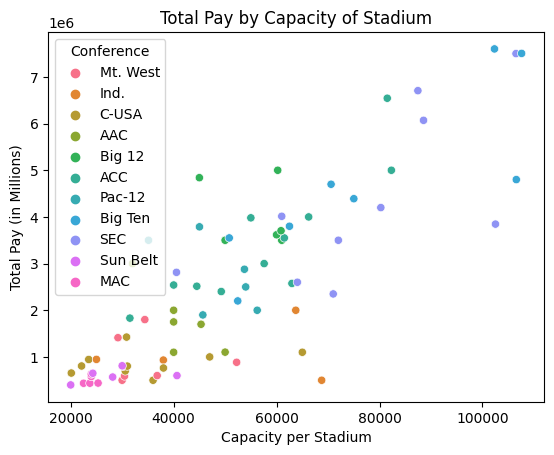

In [136]:
SalaryVCapacity = sns.scatterplot(x='Capacity', y='TotalPay', data=df4, hue='Conference')
SalaryVCapacity = plt.ylabel('Total Pay (in Millions)')
SalaryVCapacity = plt.xlabel('Capacity per Stadium')
SalaryVCapacity = plt.title('Total Pay by Capacity of Stadium')

cl1 = df4['TotalPay']
cl2= df4['Capacity']
corr = cl1.corr(cl2)
corr

Scatterplot for Total Pay vs Number of Wins

Text(0, 0.5, 'Average Salary (In Millions)')

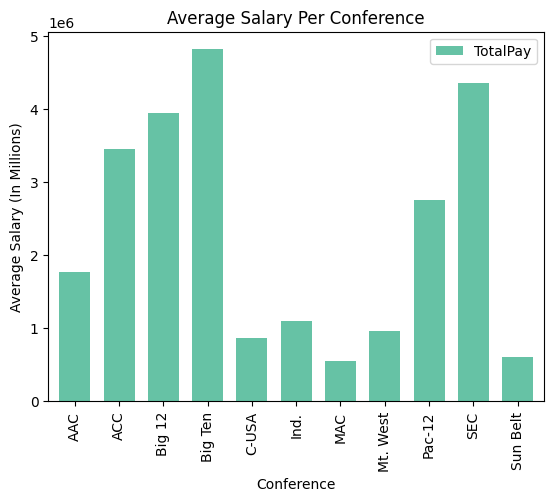

In [109]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
df6['TotalPay'] = df6['TotalPay'].apply(lambda x: round(x, 2))


df4['SchoolPay'] = df4['SchoolPay'].astype(int)
df4['TotalPay'] = df4['TotalPay'].astype(int)
df4['Bonus'] = df4['Bonus'].astype(int)
df4['BonusPaid'] = df4['BonusPaid'].astype(int)
df4['AssistantPay'] = df4['AssistantPay'].astype(int)
df4['Buyout'] = df4['Buyout'].astype(int)
df4['winpercent'] = df4['W']/(df3['W']+df3['L'])
#get averages based off the conferences
df6 = df4.groupby(['Conference']).mean()
df6['Conf'] = ('AAC', 'ACC', 'Big 12', 'Big Ten', 'C-USA','Ind.','MAC','Mt. West','Pac-12','SEC','Sun Belt')
df6['SchoolPay'] = df4['SchoolPay'].astype(int)
df6
#df6.info()
#objects = df2['Conference']
#y_pos = np.arange(len(objects))
#performance = df5['SchoolPay'] 
confav = df6.plot.bar(x='Conf', y='TotalPay', rot=90, width=.7, colormap = 'Set2')
#confav.plot(figsize=(20,17))

confav.set_xlabel('Conference')
confav.set_title('Average Salary Per Conference')
confav.set_ylabel('Average Salary (In Millions)')


Text(0, 0.5, 'Average Salary (In Millions)')

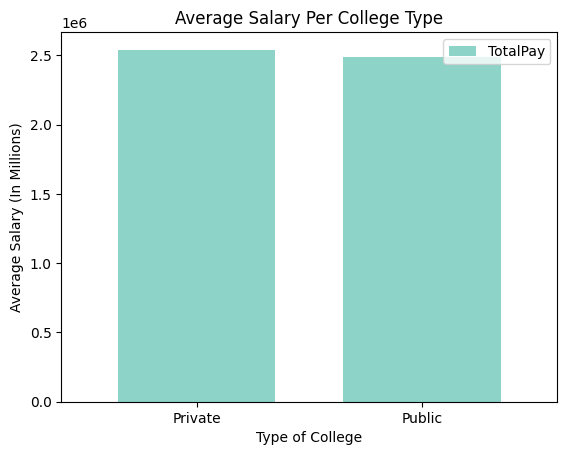

In [110]:
df5 = df4.groupby(['SCL_PRIVATE']).mean()
df5['Private'] = ('Private','Public')
#df5
df5['SchoolPay'] = df5['SchoolPay'].astype(int)

mycolors = [['r','g']]
confav = df5.plot.bar(x='Private', y='TotalPay', rot=0, width=.7, colormap = 'Set3')
confav.set_xlabel('Type of College')
confav.set_title('Average Salary Per College Type')
confav.set_ylabel('Average Salary (In Millions)')

0.6931576837015688


0.8534812893999554

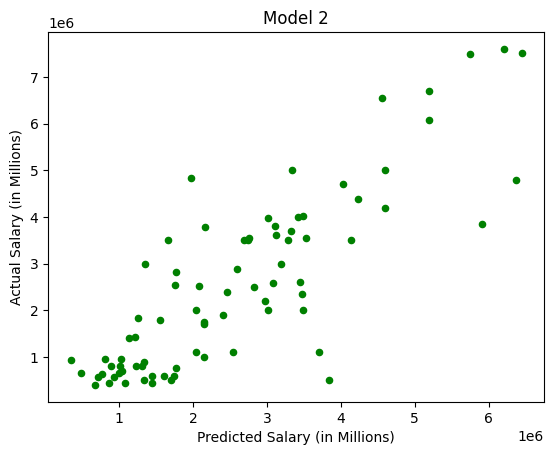

In [131]:
 
#remove perc.alumni, w, scl_private as the p value is very high
X1 = df3[['Capacity','GSR_2006_SA','FED_N_2006_SA']] 
Y1 = df3['SchoolPay']

# with sklearn
model1 = sm.OLS(Y1, X1).fit()
predictions1 = model1.predict(X1)
model1.summary() 
df3['Pred Salary']= predictions1
df3
#predictions1
#pred_graph = sns.scatterplot('')
ActualVsPred = df3.plot.scatter(x='Pred Salary',y='TotalPay',c='Green')
ActualVsPred.set_xlabel('Predicted Salary (in Millions)')
ActualVsPred.set_title('Model 2')
ActualVsPred.set_ylabel('Actual Salary (in Millions)')


x1_values = df3['TotalPay']
y2_values = df3['Pred Salary']

correlation_matrix1 = np.corrcoef(x1_values, y2_values)
correlation_xy1 = correlation_matrix1[0,1]
r_squared1 = correlation_xy1 **2
print(r_squared1)

col1 = df3['TotalPay']
col2= df3['Pred Model 1']
correl = col1.corr(col2)
correl

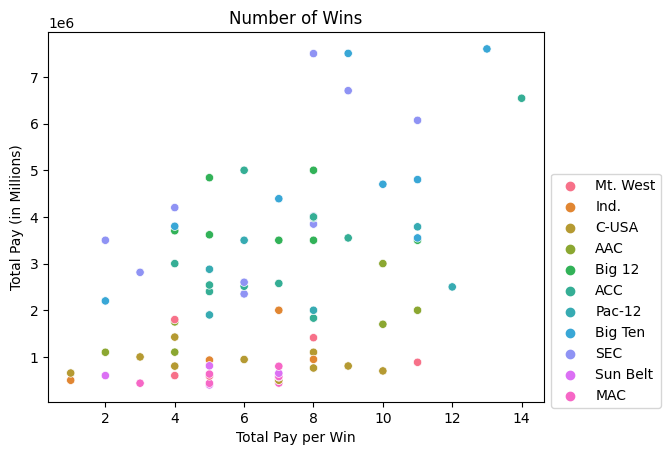

In [113]:
TotalvsW = sns.scatterplot(x='W', y='TotalPay', data=df4, hue='Conference')
TotalvsW= plt.xlabel('Total Pay per Win')
TotalvsW = plt.title('Number of Wins')
TotalvsW = plt.ylabel('Total Pay (in Millions)')
TotalvsW = plt.legend(loc='center right', bbox_to_anchor=[1.25, 0.3])


#find correlation between the two
column_1 = df4['W']
column_2 = df4["TotalPay"]
corr = column_1.corr(column_2)

0.7278730583870173


0.8531547681323813

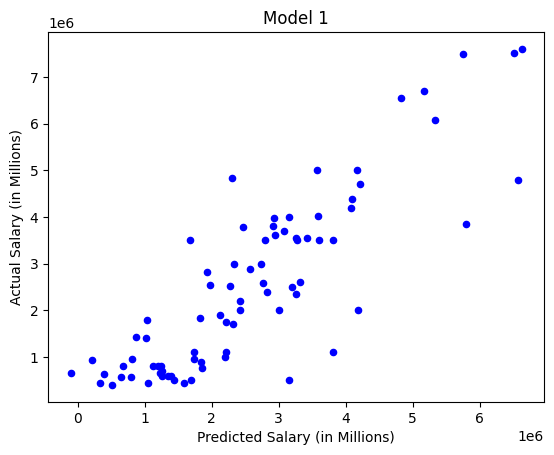

In [133]:
X = df3[['Conference','W','Capacity','SCL_PRIVATE', 'GSR_2006_SA', 'perc.alumni','FED_N_2006_SA']] 
Y = df3['SchoolPay']

# with sklearn
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()
df3['Pred Model 1']= predictions
df3

ActualVsPredM1 = df3.plot.scatter(x='Pred Model 1',y='TotalPay',c='Blue')
ActualVsPredM1.set_xlabel('Predicted Salary (in Millions)')
ActualVsPredM1.set_title('Model 1')
ActualVsPredM1.set_ylabel('Actual Salary (in Millions)')

x_values = df3['TotalPay']
y_values = df3['Pred Model 1']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)
col1 = df3['TotalPay']
col2= df3['Pred Model 1']
correl = col1.corr(col2)
correl

In [135]:
#df3.loc[df3['College'] == 'Syracuse', 'Pred Salary']
#df3.loc[df3['College'] == 'Syracuse', 'Pred Model 1']

#df3.loc[df3['College'] == 'Syracuse', 'Conference']
df3.loc[(df3.College == 'Syracuse'),'Conference']=12

model1 = sm.OLS(Y, X).fit()
syr_test = model1.predict(X)
model.summary()
df3['Pred Model 2']= syr_test

df3.loc[df3['College'] == 'Syracuse', 'Pred Model 2']
           

28   2832029.468
Name: Pred Model 2, dtype: float64

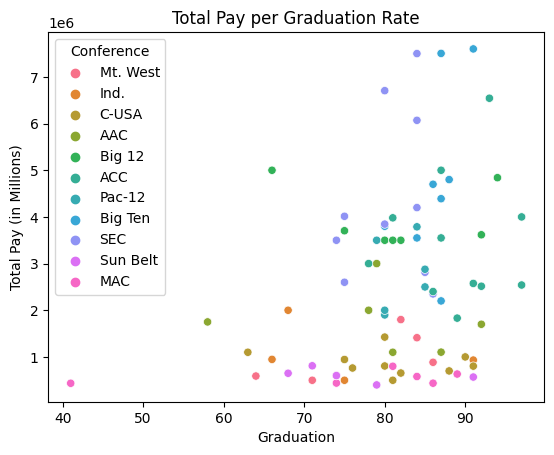

In [137]:
GSRvsSalary = sns.scatterplot(x='GSR_2006_SA', y='TotalPay', data=df4, hue='Conference')
GSRvsSalary = plt.ylabel('Total Pay (in Millions)')
GSRvsSalary = plt.xlabel('Graduation')
GSRvsSalary = plt.title('Total Pay per Graduation Rate')
